**OCD Patient Dataset: Demographics & Clinical Data**
###Project-1###

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
#Loading the dataset
df = pd.read_csv("ocd_data.csv")

In [33]:
#Exploring first few rows of the dataset
print(df.head())

   Patient ID  Age  Gender Ethnicity Marital Status Education Level  \
0        1018   32  Female   African         Single    Some College   
1        2406   69    Male   African       Divorced    Some College   
2        1188   57    Male  Hispanic       Divorced  College Degree   
3        6200   27  Female  Hispanic        Married  College Degree   
4        5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180                NaN   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related        Checking   
1           

In [37]:
#Getting Summary of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [43]:
#Checking for missing values
print(df.isnull().sum())

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64


In [49]:
#Summarising statistics for Numerical columns
print(df.describe())

        Patient ID          Age  Duration of Symptoms (months)  \
count  1500.000000  1500.000000                    1500.000000   
mean   5541.254000    46.781333                     121.745333   
std    2562.389469    16.830321                      67.404610   
min    1017.000000    18.000000                       6.000000   
25%    3338.000000    32.000000                      64.000000   
50%    5539.500000    47.000000                     121.000000   
75%    7745.500000    61.000000                     178.000000   
max    9995.000000    75.000000                     240.000000   

       Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  
count                1500.000000                  1500.00000  
mean                   20.048000                    19.62600  
std                    11.823884                    11.78287  
min                     0.000000                     0.00000  
25%                    10.000000                     9.00000  
50%                    20.0

In [59]:
#Summarising statistics for categorical columns
df.describe()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


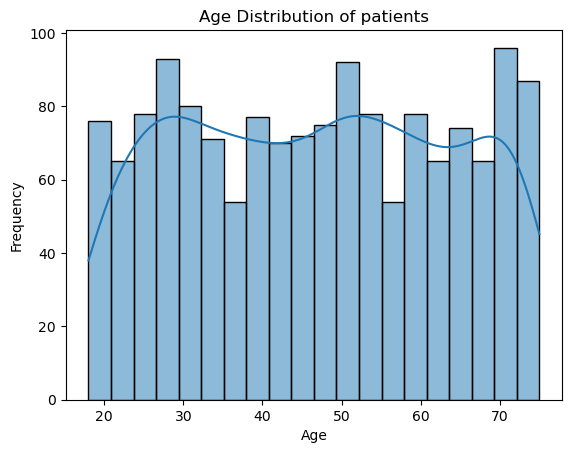

In [65]:
#Age Distribution
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution of patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

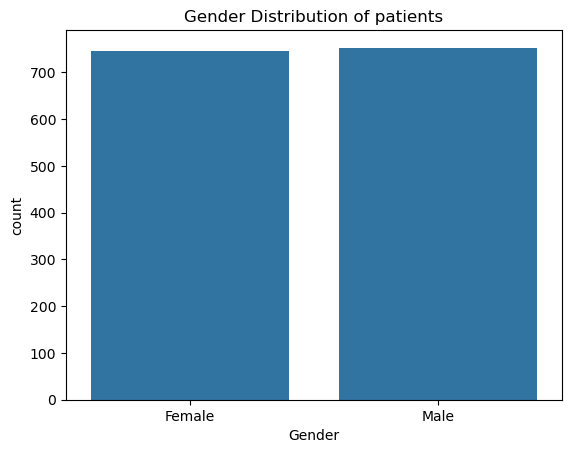

In [69]:
#Gender Distribution
sns.countplot(x="Gender", data=df )
plt.title("Gender Distribution of patients")
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()

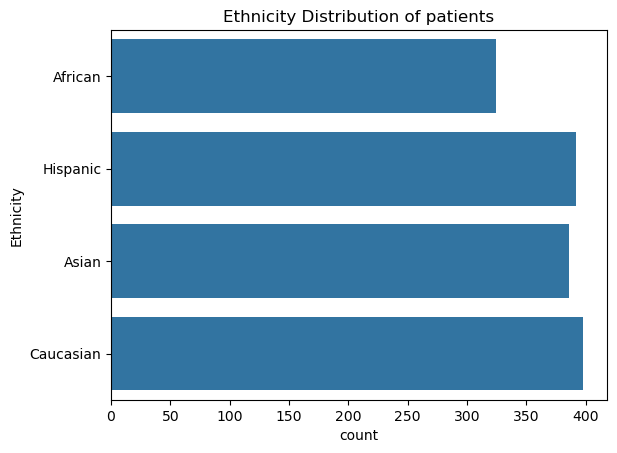

In [73]:
#Ethnicity Distribution
sns.countplot(y="Ethnicity", data=df )
plt.title("Ethnicity Distribution of patients")
plt.xlabel("count")
plt.ylabel("Ethnicity")
plt.show()

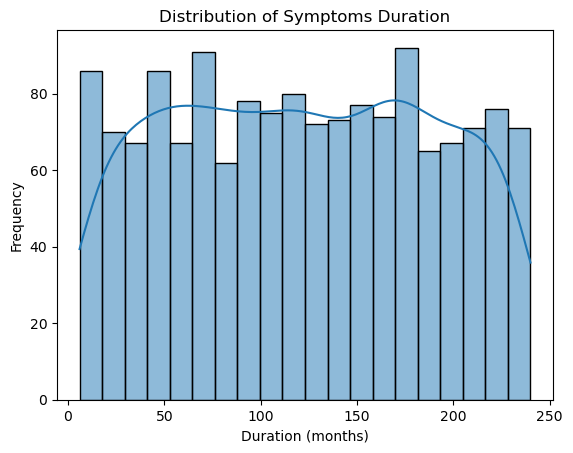

In [77]:
#Distribution of sympton duration
sns.histplot(df["Duration of Symptoms (months)"], bins=20, kde=True)
plt.title("Distribution of Symptoms Duration")
plt.xlabel("Duration (months)")
plt.ylabel("Frequency")
plt.show()

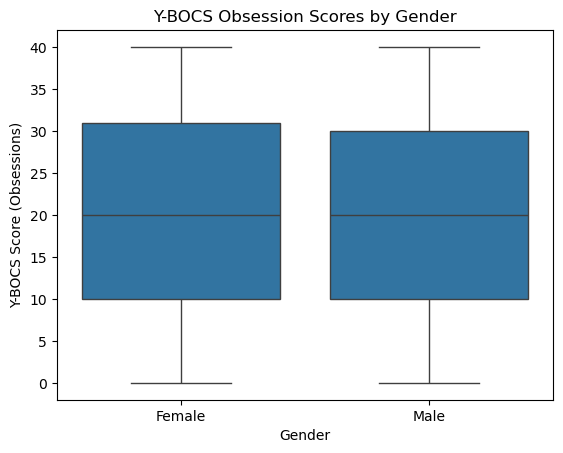

In [91]:
#Boxplot of Y-Bocs Scores by Gender
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=df)
plt.title('Y-BOCS Obsession Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score (Obsessions)')
plt.show()

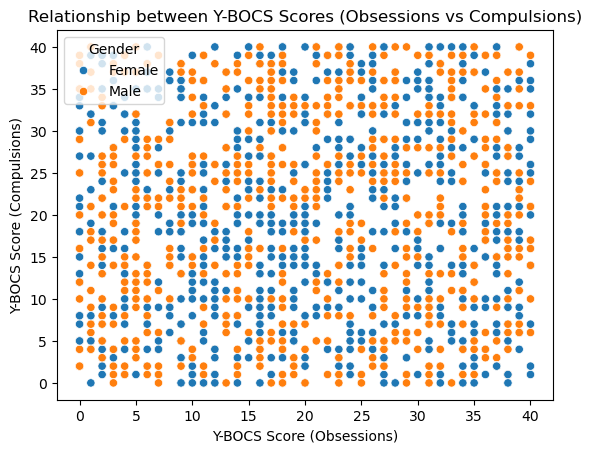

In [109]:
# Relationship between Obsession and Compulsion Y-BOCS Scores
sns.scatterplot(
    x='Y-BOCS Score (Obsessions)',
    y='Y-BOCS Score (Compulsions)',
    hue='Gender',
    data=df
)

plt.title('Relationship between Y-BOCS Scores (Obsessions vs Compulsions)')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.show()

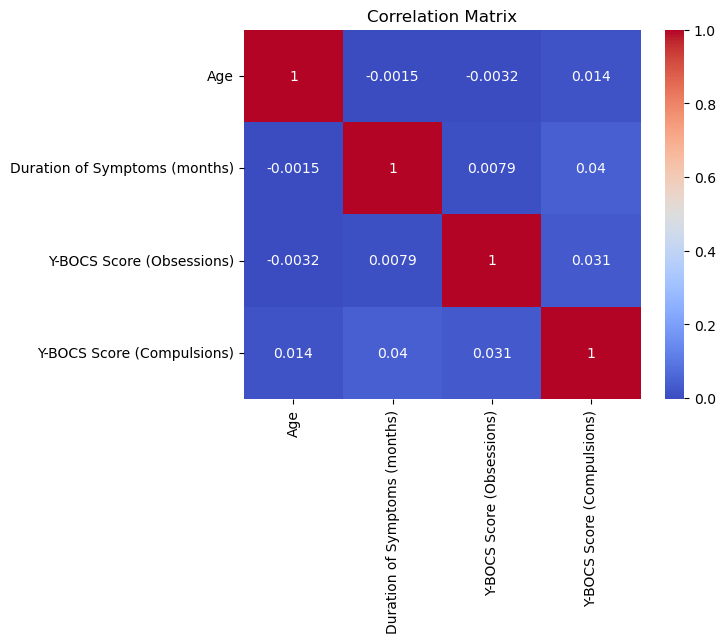

In [111]:
# Correlation matrix
corr_matrix = df[['Age' , 'Duration of Symptoms (months)','Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show() 

**Key Insights and Reporting**

In [116]:
# Step 1: Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [120]:
# Step 2: Loading our dataset
df = pd.read_csv("ocd_data.csv")  # Change filename if needed
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [124]:
# Step 3: Checking for nulls
df.info()
df.dropna(inplace=True)  

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 1498
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     925 non-null    int64 
 1   Age                            925 non-null    int64 
 2   Gender                         925 non-null    object
 3   Ethnicity                      925 non-null    object
 4   Marital Status                 925 non-null    object
 5   Education Level                925 non-null    object
 6   OCD Diagnosis Date             925 non-null    object
 7   Duration of Symptoms (months)  925 non-null    int64 
 8   Previous Diagnoses             925 non-null    object
 9   Family History of OCD          925 non-null    object
 10  Obsession Type                 925 non-null    object
 11  Compulsion Type                925 non-null    object
 12  Y-BOCS Score (Obsessions)      925 non-null    int64 
 13  Y-BOCS Sc

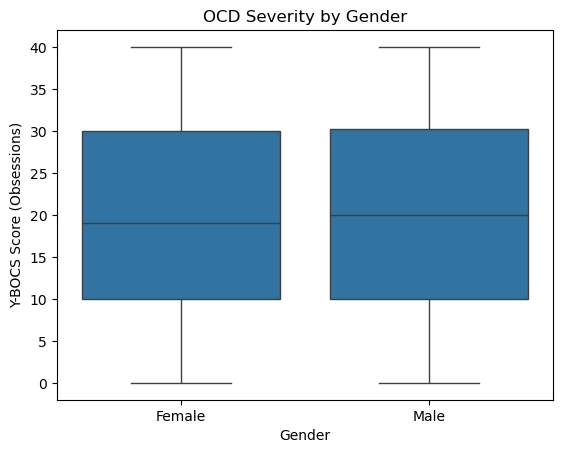

In [148]:
# Step 4: Severity differences based on Gender and age
sns.boxplot(x="Gender", y="Y-BOCS Score (Obsessions)", data=df)
plt.title("OCD Severity by Gender")
plt.show()

/var/folders/04/wzdclyk12vggjmf0dsjkl8sr0000gn/T/ipykernel_39079/1858553735.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=med_counts.index, y=med_counts.values, palette="Blues_d")


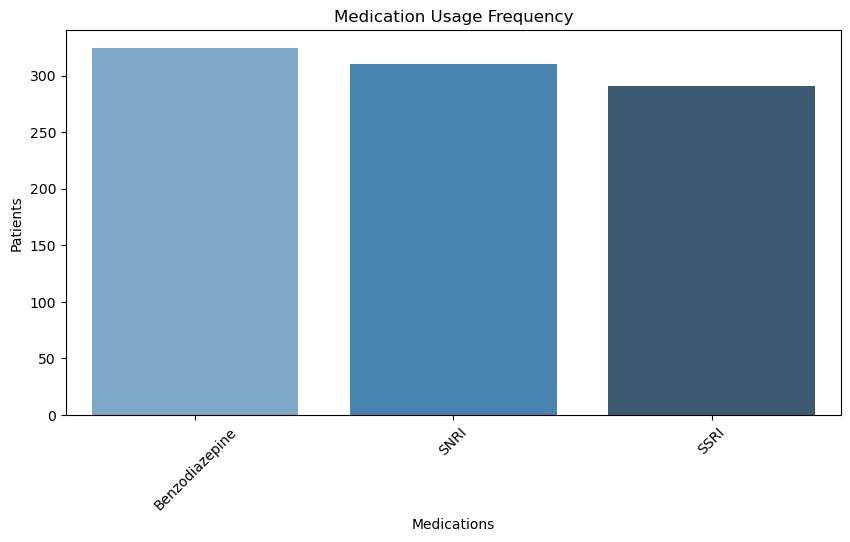

In [158]:
#Step 5 : Medication Frequency
plt.figure(figsize=(10, 5))
med_counts = df["Medications"].value_counts()
sns.barplot(x=med_counts.index, y=med_counts.values, palette="Blues_d")
plt.title("Medication Usage Frequency")
plt.ylabel("Patients")
plt.xticks(rotation=45)
plt.show()

Avg YBOCS by Medication:
 Medications
SSRI              20.508591
Benzodiazepine    20.456790
SNRI              19.235484
Name: Y-BOCS Score (Obsessions), dtype: float64


/var/folders/04/wzdclyk12vggjmf0dsjkl8sr0000gn/T/ipykernel_39079/2332561409.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=med_avg.index, y=med_avg.values, palette="coolwarm")


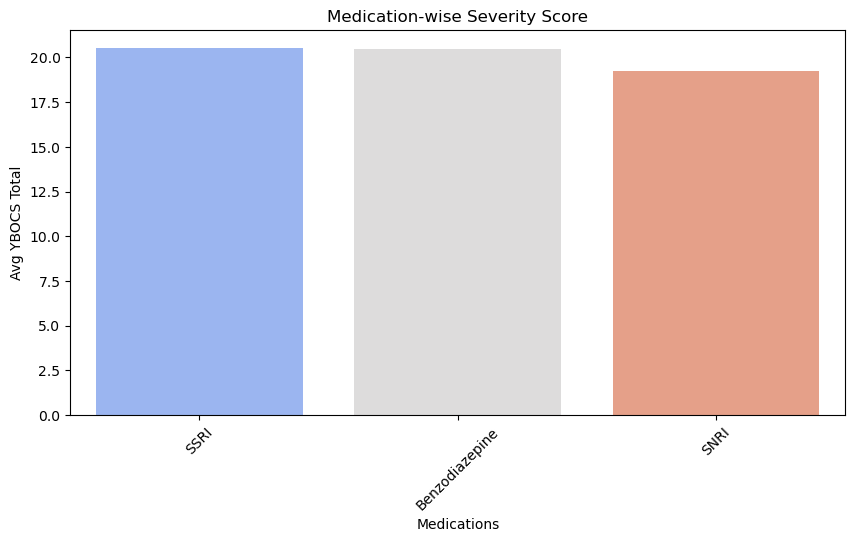

In [170]:
#Step 6: Medication vs Severity
med_avg = df.groupby("Medications")["Y-BOCS Score (Obsessions)"].mean().sort_values(ascending=False)
print("Avg YBOCS by Medication:\n", med_avg)

plt.figure(figsize=(10, 5))
sns.barplot(x=med_avg.index, y=med_avg.values, palette="coolwarm")
plt.title("Medication-wise Severity Score")
plt.xticks(rotation=45)
plt.ylabel("Avg YBOCS Total")
plt.show()


In [9]:
from scipy import stats
import pandas as pd
import base64,os,random,gc
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plotter
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
import catboost
from catboost import CatBoostClassifier
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin,ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
optuna.logging.set_verbosity(optuna.logging.WARNING)
from lightgbm import *
pd.set_option("display.max_columns", None)
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance
import warnings
warnings.filterwarnings('ignore')

In [17]:
#Reading Dataset
train =pd.read_csv("ocd_data.csv")
display(train.head())

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


train


Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

<Axes: title={'center': 'Training Set'}>

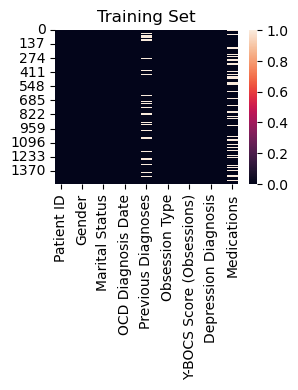

In [21]:
#EDA
print('train')
display(train.isnull().sum())
plt.figure(figsize = (10, 2))
plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.heatmap(train.isnull())

<Axes: >

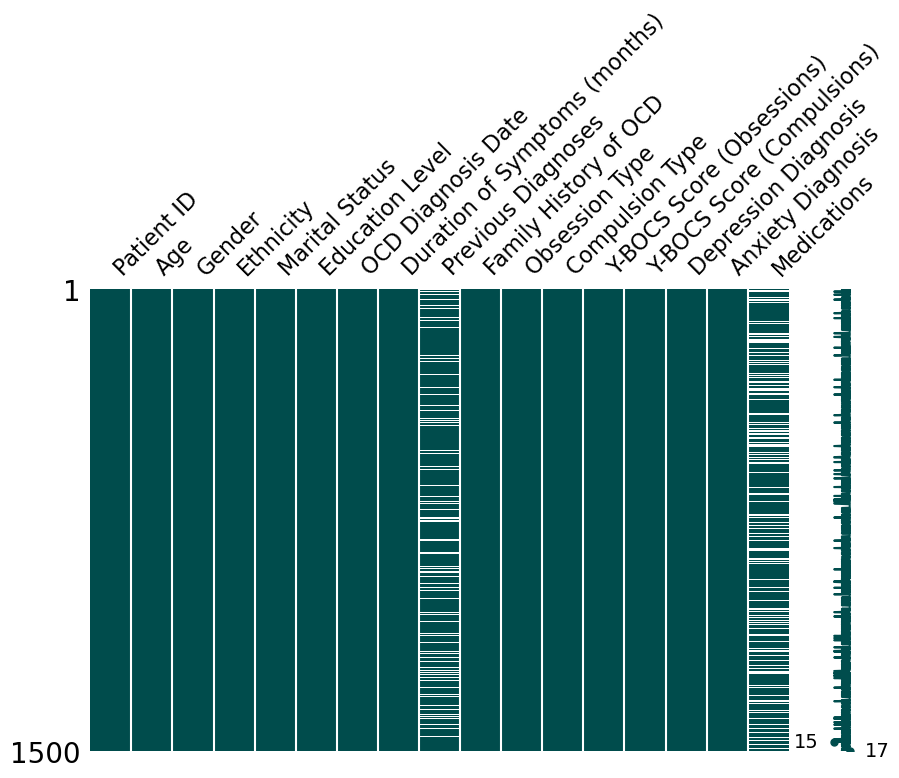

In [25]:
msno.matrix(df=train, figsize=(10,6), color=(0,.3,.3))

In [29]:
print('train')
display(train.info())

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 1

None

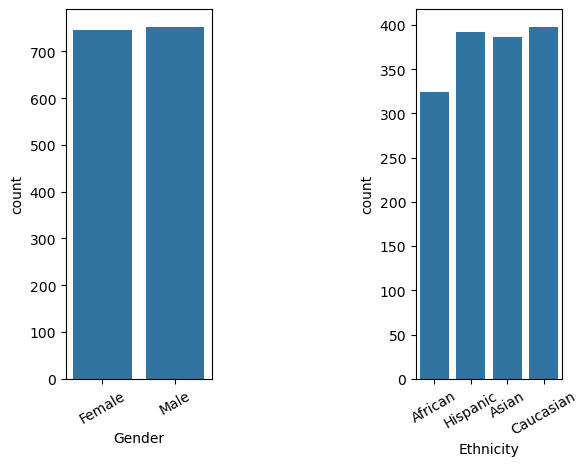

In [33]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Gender"])
plotter.xticks(rotation = 30);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Ethnicity"])
plotter.xticks(rotation = 30);

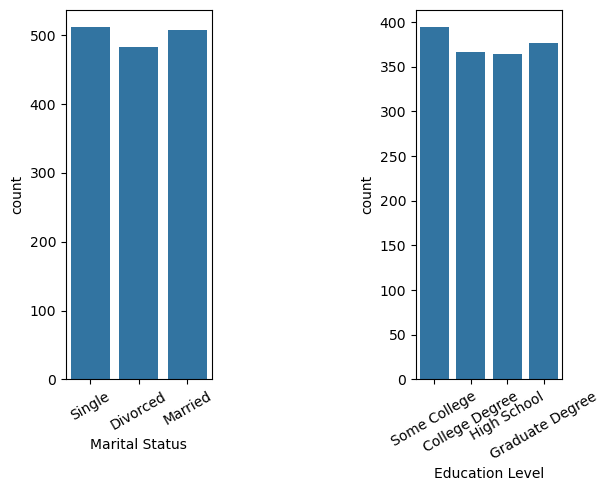

In [37]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Marital Status"])
plotter.xticks(rotation = 30);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Education Level"])
plotter.xticks(rotation = 30);

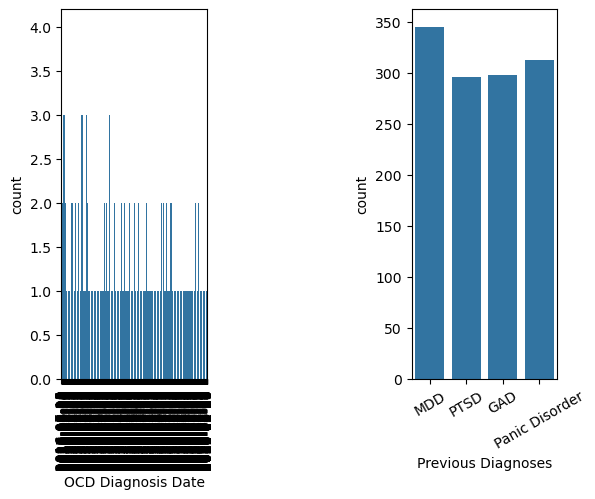

In [41]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["OCD Diagnosis Date"])
plotter.xticks(rotation = 90);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Previous Diagnoses"])
plotter.xticks(rotation = 30);

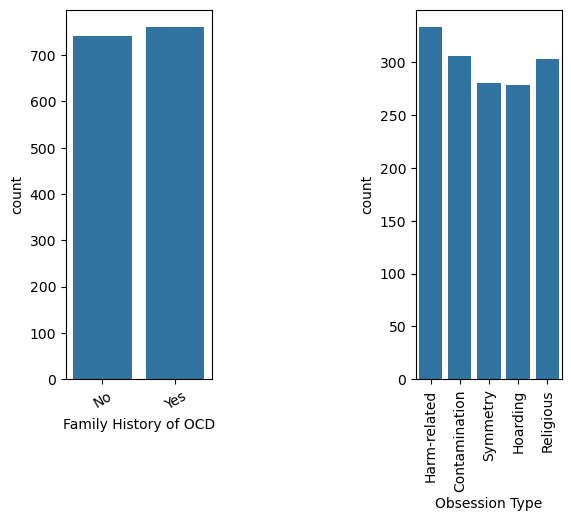

In [45]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Family History of OCD"])
plotter.xticks(rotation = 30);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Obsession Type"])
plotter.xticks(rotation = 90);

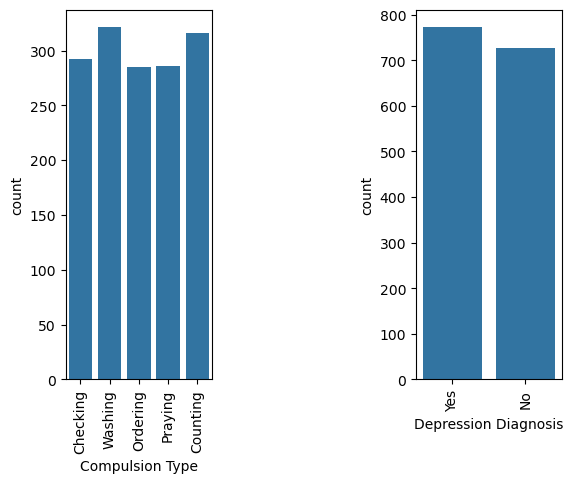

In [49]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Compulsion Type"])
plotter.xticks(rotation = 90);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Depression Diagnosis"])
plotter.xticks(rotation = 90);

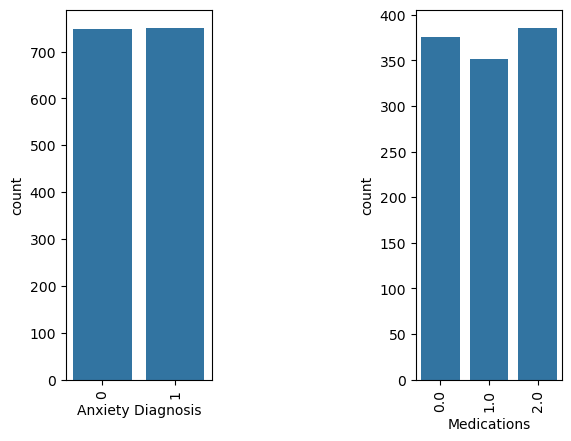

In [83]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Anxiety Diagnosis"])
plotter.xticks(rotation = 90);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Medications"])
plotter.xticks(rotation = 90);

In [135]:
# Replacing categorical variables with numerical codes
train["Gender"] = train["Gender"].replace({'Female': 1, 'Male': 2})
train["Ethnicity"] = train["Ethnicity"].replace({'African': 1, 'Hispanic': 2, 'Asian': 3, 'Caucasian': 4})
train["Marital Status"] = train["Marital Status"].replace({'Single': 1, 'Divorced': 2, 'Married': 3})
train["Education Level"] = train["Education Level"].replace({'Some College': 1, 'College Degree': 2, 'High School': 3, 'Graduate Degree': 4})

# Drop the column safely (no 'coerce', use 'ignore')
train = train.drop(columns=['OCD Diagnosis Date'], axis=1, errors="ignore")

train["Previous Diagnoses"] = train["Previous Diagnoses"].replace({'MDD': 1, 'PTSD': 2, 'GAD': 3, 'Panic Disorder': 4})
train["Family History of OCD"] = train["Family History of OCD"].replace({'No': 1, 'Yes': 2})
train["Obsession Type"] = train["Obsession Type"].replace({'Harm-related': 1, 'Contamination': 2, 'Symmetry': 3, 'Hoarding': 4, 'Religious': 5})
train["Compulsion Type"] = train["Compulsion Type"].replace({'Checking': 1, 'Washing': 2, 'Ordering': 3, 'Praying': 4, 'Counting': 5})
train["Depression Diagnosis"] = train["Depression Diagnosis"].replace({'No': 1, 'Yes': 2})
train["Anxiety Diagnosis"] = train["Anxiety Diagnosis"].replace({'No': 1, 'Yes': 2})
train["Medications"] = train["Medications"].replace({'SNRI': 0, 'SSRI': 1, 'Benzodiazepine': 2})

# Display the final dataframe
display(train)


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,1,1,1,1,203,1.0,1,1,1,17,10,2,2,0.0
1,2406,69,2,1,2,1,180,NaN,2,1,2,21,25,2,2,1.0
2,1188,57,2,2,2,2,173,1.0,1,2,1,3,4,1,1,2.0
3,6200,27,1,2,3,2,126,2.0,2,3,2,14,28,2,2,1.0
4,5824,56,1,2,3,3,168,2.0,2,4,3,39,18,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,2,2,2,2,53,1.0,1,2,2,21,33,2,2,1.0
1496,5013,19,1,2,2,4,160,3.0,2,4,4,25,16,2,2,1.0
1497,6089,40,2,3,3,1,100,NaN,2,2,5,2,15,2,2,2.0
1498,3808,37,1,4,3,1,210,3.0,2,2,2,16,7,2,1,2.0


In [105]:
print(type(train))

<class 'NoneType'>


In [117]:
import pandas as pd
train = pd.read_csv("ocd_data.csv")



In [123]:
print(train.columns.tolist())
train.columns = train.columns.str.strip()  # Sab column ke ends se space hata dega


['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Level', 'OCD Diagnosis Date', 'Duration of Symptoms (months)', 'Previous Diagnoses', 'Family History of OCD', 'Obsession Type', 'Compulsion Type', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)', 'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications']


In [127]:
print(train["Gender"].unique())


['Female' 'Male']


In [137]:
train["Gender"] = train["Gender"].replace({'Female': 1, 'Male': 2})


In [141]:
#Previous Diagnoses
print("Skewness: %f" % train['Previous Diagnoses'].skew())
print("Kurtosis: %f" % train['Previous Diagnoses'].kurt())

Skewness: 0.040787
Kurtosis: -1.409371


In [149]:
from sklearn.impute import SimpleImputer
num_cols = ['Previous Diagnoses']
num_imp= SimpleImputer(strategy='mean')
train[num_cols]=pd.DataFrame(num_imp.fit_transform(train[num_cols]),columns=num_cols)

In [153]:
train

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,1,1,1,1,203,1.00000,1,1,1,17,10,2,2,0.0
1,2406,69,2,1,2,1,180,2.46246,2,1,2,21,25,2,2,1.0
2,1188,57,2,2,2,2,173,1.00000,1,2,1,3,4,1,1,2.0
3,6200,27,1,2,3,2,126,2.00000,2,3,2,14,28,2,2,1.0
4,5824,56,1,2,3,3,168,2.00000,2,4,3,39,18,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,2,2,2,2,53,1.00000,1,2,2,21,33,2,2,1.0
1496,5013,19,1,2,2,4,160,3.00000,2,4,4,25,16,2,2,1.0
1497,6089,40,2,3,3,1,100,2.46246,2,2,5,2,15,2,2,2.0
1498,3808,37,1,4,3,1,210,3.00000,2,2,2,16,7,2,1,2.0


In [169]:
train = train.dropna(axis=0, how="any")
train

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,1,1,1,1,203,1.00000,1,1,1,17,10,2,2,0.0
1,2406,69,2,1,2,1,180,2.46246,2,1,2,21,25,2,2,1.0
2,1188,57,2,2,2,2,173,1.00000,1,2,1,3,4,1,1,2.0
3,6200,27,1,2,3,2,126,2.00000,2,3,2,14,28,2,2,1.0
5,6946,32,1,3,3,2,46,3.00000,1,4,3,26,11,2,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,2,2,2,2,53,1.00000,1,2,2,21,33,2,2,1.0
1496,5013,19,1,2,2,4,160,3.00000,2,4,4,25,16,2,2,1.0
1497,6089,40,2,3,3,1,100,2.46246,2,2,5,2,15,2,2,2.0
1498,3808,37,1,4,3,1,210,3.00000,2,2,2,16,7,2,1,2.0


<Axes: >

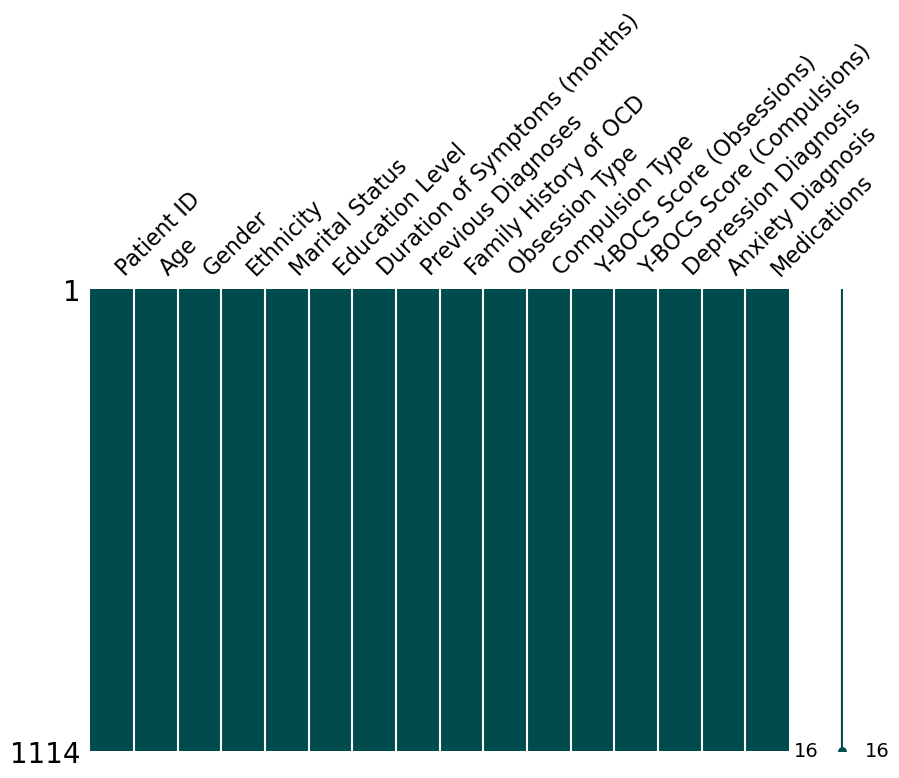

In [173]:
msno.matrix(df=train, figsize=(10,6), color=(0,.3,.3))

In [177]:
train_feature = train.columns.drop('Medications').tolist()
train_feature

['Patient ID',
 'Age',
 'Gender',
 'Ethnicity',
 'Marital Status',
 'Education Level',
 'Duration of Symptoms (months)',
 'Previous Diagnoses',
 'Family History of OCD',
 'Obsession Type',
 'Compulsion Type',
 'Y-BOCS Score (Obsessions)',
 'Y-BOCS Score (Compulsions)',
 'Depression Diagnosis',
 'Anxiety Diagnosis']

In [181]:
train[train_feature].describe().T \
    .style \
    .bar(subset=["mean"], color=px.colors.qualitative.G10[0]) \
    .background_gradient(subset=["std"], cmap="BuPu") \
    .background_gradient(subset=["50%"], cmap="Reds")


,count,mean,std,min,25%,50%,75%,max
Patient ID,1114.000000,5546.394973,2568.490997,1017.000000,3334.750000,5607.000000,7757.500000,9995.000000
Age,1114.000000,46.660682,16.889784,18.000000,32.000000,47.000000,61.000000,75.000000
Gender,1114.000000,1.500898,0.500224,1.000000,1.000000,2.000000,2.000000,2.000000
Ethnicity,1114.000000,2.582585,1.091049,1.000000,2.000000,3.000000,4.000000,4.000000
Marital Status,1114.000000,1.987433,0.820790,1.000000,1.000000,2.000000,3.000000,3.000000
Education Level,1114.000000,2.484740,1.129623,1.000000,1.000000,2.000000,3.000000,4.000000
Duration of Symptoms (months),1114.000000,123.126571,67.473845,6.000000,65.000000,123.000000,179.000000,239.000000
Previous Diagnoses,1114.000000,2.441118,1.033862,1.000000,2.000000,2.462460,3.000000,4.000000
Family History of OCD,1114.000000,1.512567,0.500067,1.000000,1.000000,2.000000,2.000000,2.000000
Obsession Type,1114.000000,2.891382,1.439981,1.000000,2.000000,3.000000,4.000000,5.000000


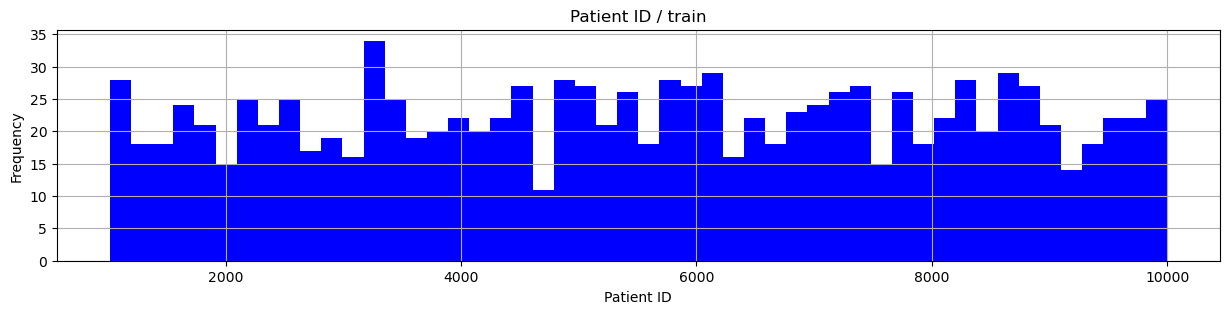

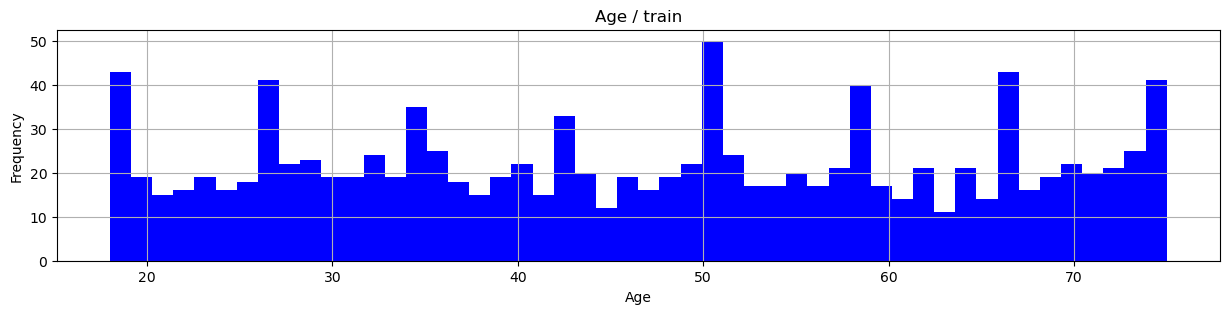

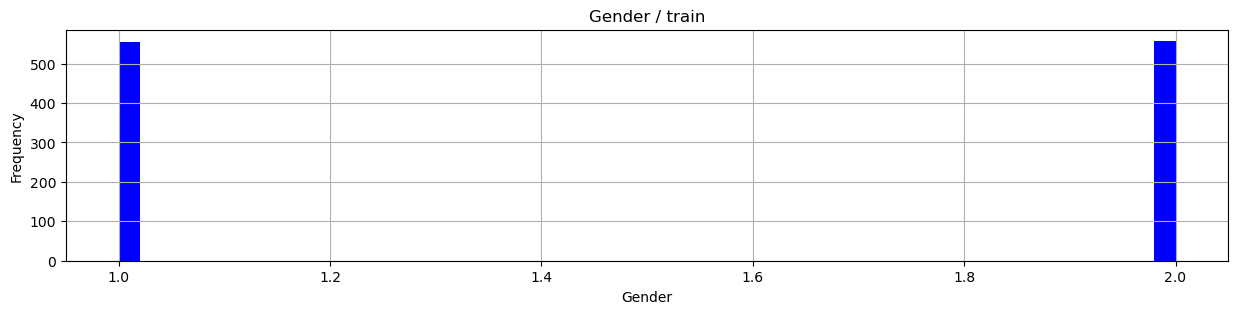

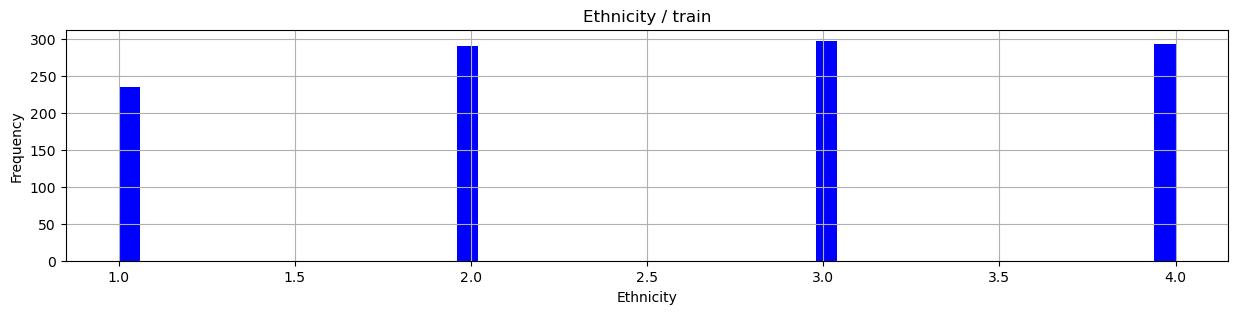

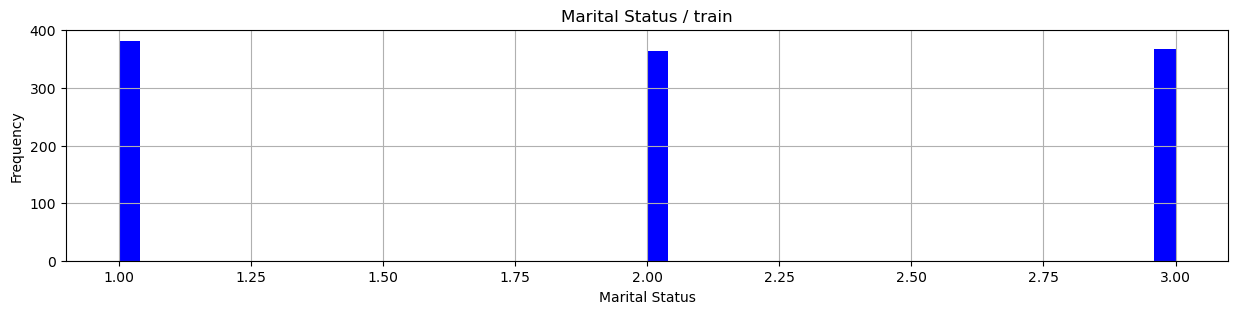

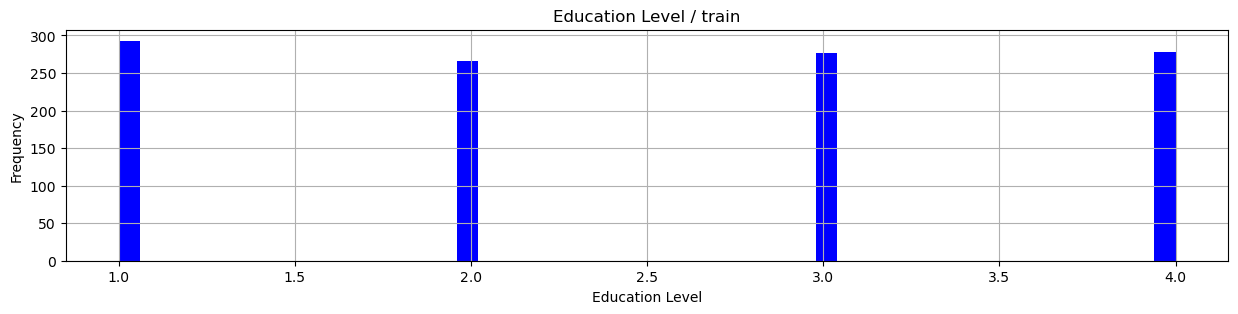

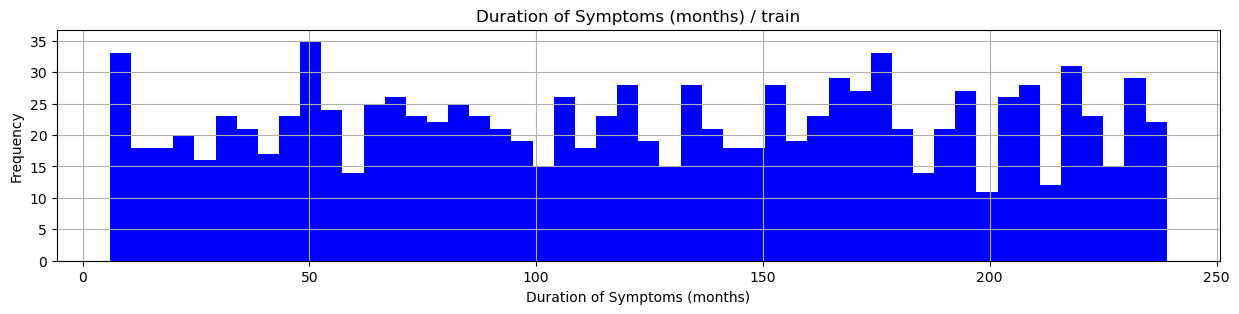

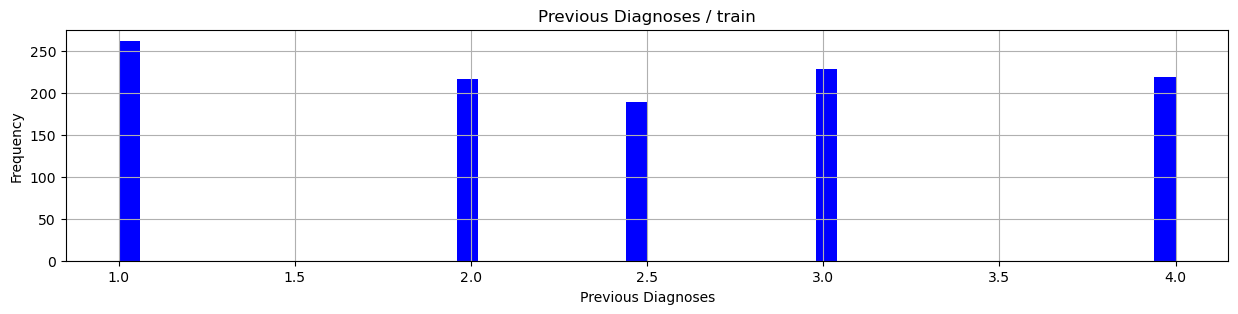

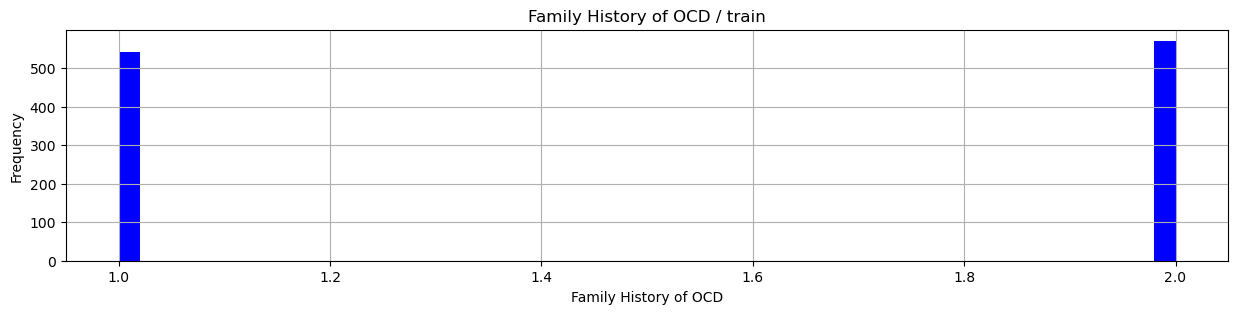

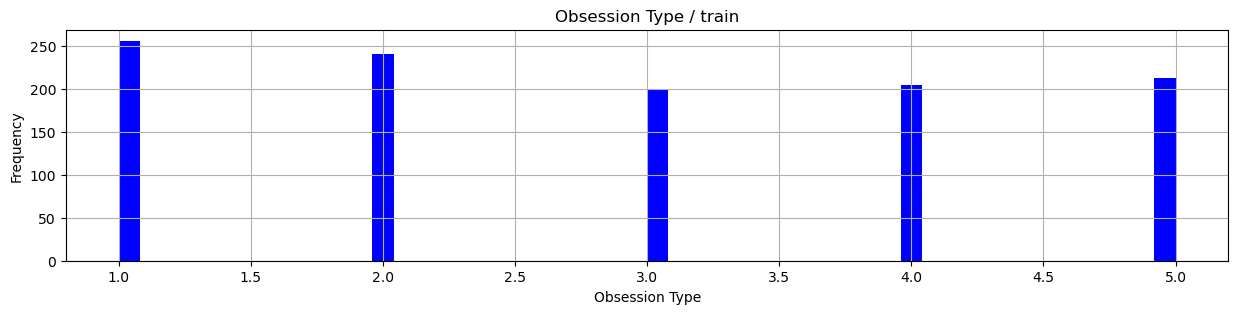

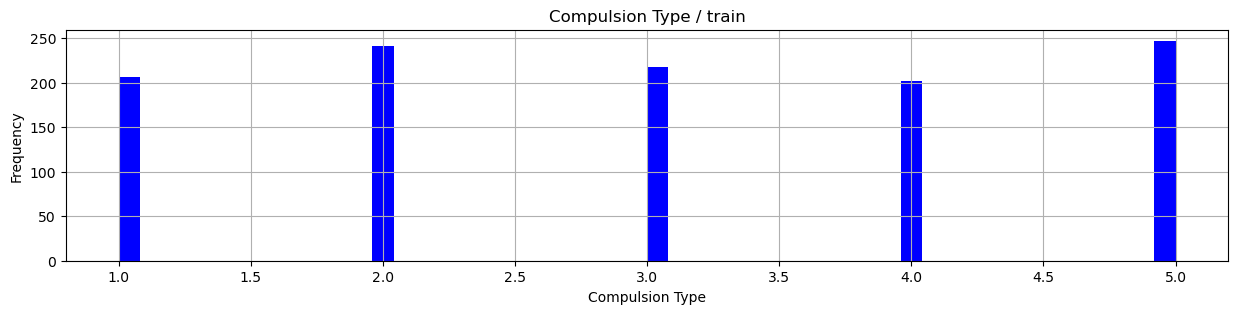

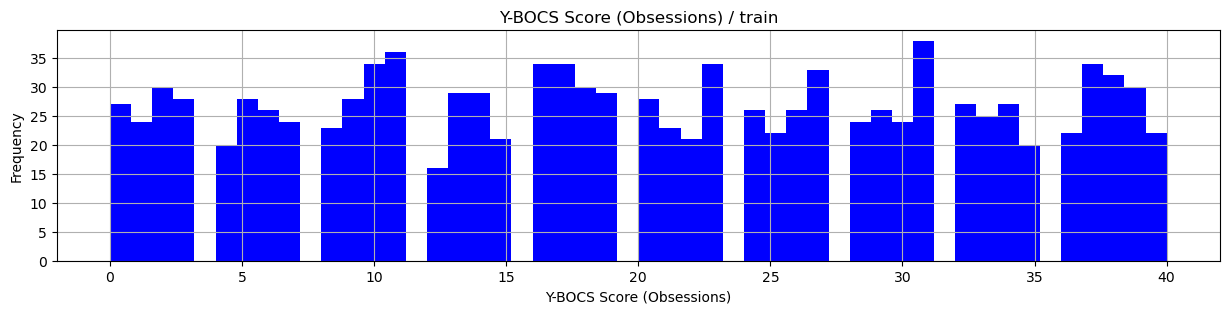

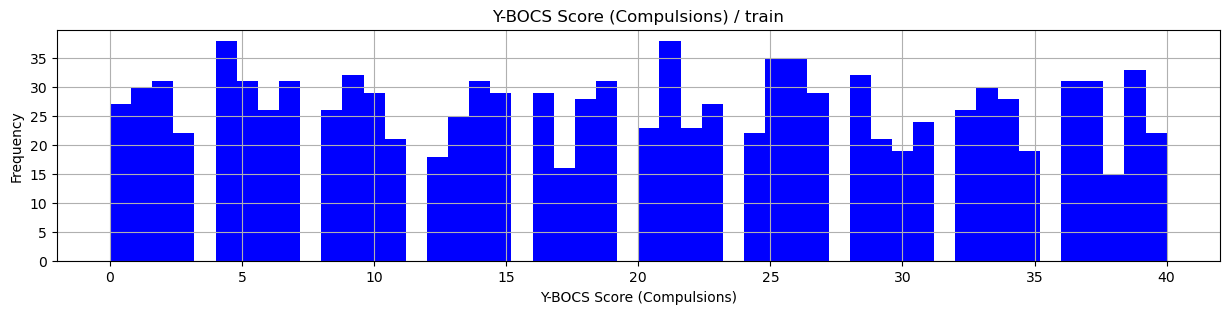

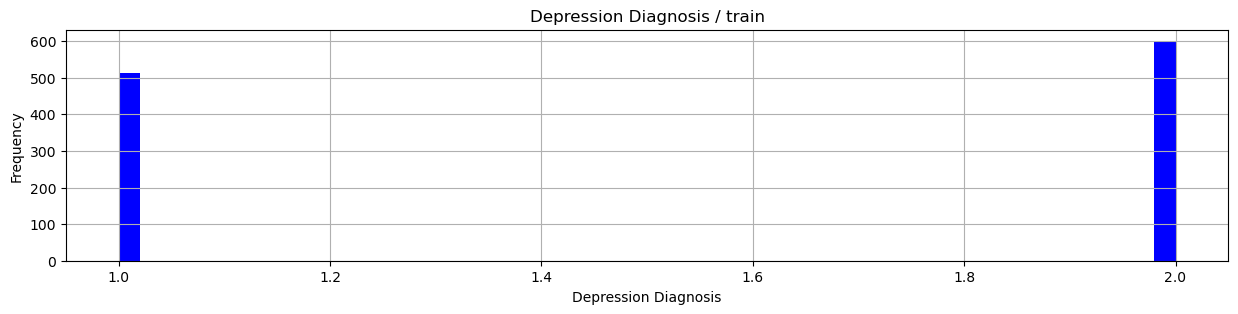

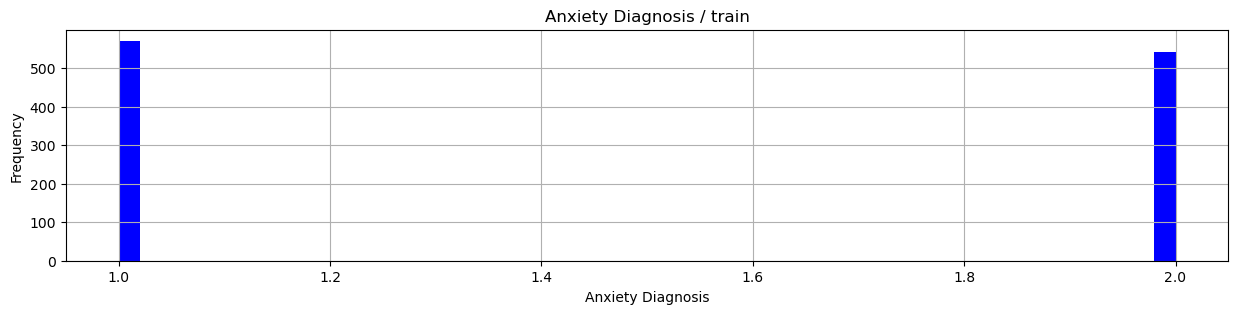

In [195]:
for feat in train_feature:
    plt.figure(figsize=(15, 3))
    train[feat].plot(kind='hist', bins=50, color='blue')
    plt.title(f'{feat} / train')
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [203]:
columns_to_check = [
    'Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Level',
    'Duration of Symptoms(months)', 'Previous Diagnoses',
    'Family History of OCD', 'Obsession Type', 'Compulsion Type',
    'Y-BOCS Score(Obsessions)', 'Y-BOCS Score(Compulsions)',
    'Depression Diagnosis', 'Anxiety Diagnosis'
]

for col in columns_to_check:
    if col in train.columns:
        print(f"📊 Column: {col}")
        print(f"  Skewness: {train[col].skew():.4f}")
        print(f"  Kurtosis: {train[col].kurt():.4f}\n")
    else:
        print(f"⚠️ Column '{col}' not found in DataFrame\n")


📊 Column: Age
  Skewness: 0.0064
  Kurtosis: -1.2048

📊 Column: Gender
  Skewness: -0.0036
  Kurtosis: -2.0036

📊 Column: Ethnicity
  Skewness: -0.0893
  Kurtosis: -1.2914

📊 Column: Marital Status
  Skewness: 0.0232
  Kurtosis: -1.5154

📊 Column: Education Level
  Skewness: 0.0098
  Kurtosis: -1.3862

⚠️ Column 'Duration of Symptoms(months)' not found in DataFrame

📊 Column: Previous Diagnoses
  Skewness: 0.0544
  Kurtosis: -1.0680

📊 Column: Family History of OCD
  Skewness: -0.0504
  Kurtosis: -2.0011

📊 Column: Obsession Type
  Skewness: 0.1129
  Kurtosis: -1.3382

📊 Column: Compulsion Type
  Skewness: 0.0087
  Kurtosis: -1.3185

⚠️ Column 'Y-BOCS Score(Obsessions)' not found in DataFrame

⚠️ Column 'Y-BOCS Score(Compulsions)' not found in DataFrame

📊 Column: Depression Diagnosis
  Skewness: -0.1587
  Kurtosis: -1.9784

📊 Column: Anxiety Diagnosis
  Skewness: 0.0504
  Kurtosis: -2.0011



Model:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Feature Importances:

Patient ID: 0.0704
Age: 0.0752
Gender: 0.0625
Ethnicity: 0.0646
Marital Status: 0.0672
Education Level: 0.0609
Duration of Symptoms (months): 0.0705
Previous Diagnoses: 0.0759
Family History of OCD: 0.0688
Ob

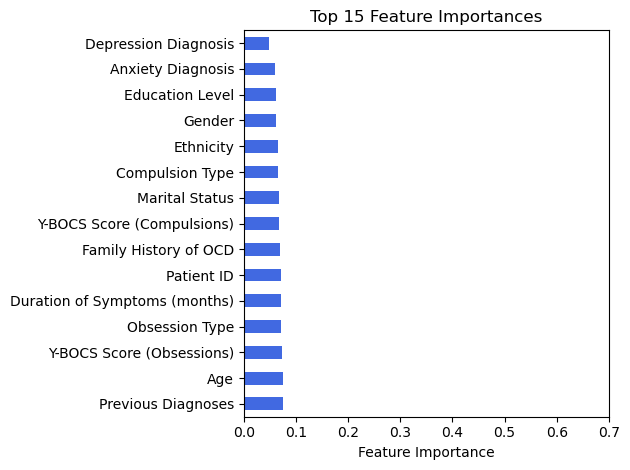

In [207]:
# Separate features and target
X_data_feature = train.drop(columns=['Medications'], axis=1)
y_data_feature = train['Medications']

# Train model
model = XGBClassifier()
model.fit(X_data_feature, y_data_feature)

# Print model summary & feature importances
print("Model:\n", model)
print("\nFeature Importances:\n")
for feature, importance in zip(X_data_feature.columns, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Plot top 15 features
feat_importances = pd.Series(model.feature_importances_, index=X_data_feature.columns)
feat_importances.nlargest(15).plot(kind='barh', color='royalblue')
plt.xlabel("Feature Importance")
plt.xlim(0, 0.7)
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()


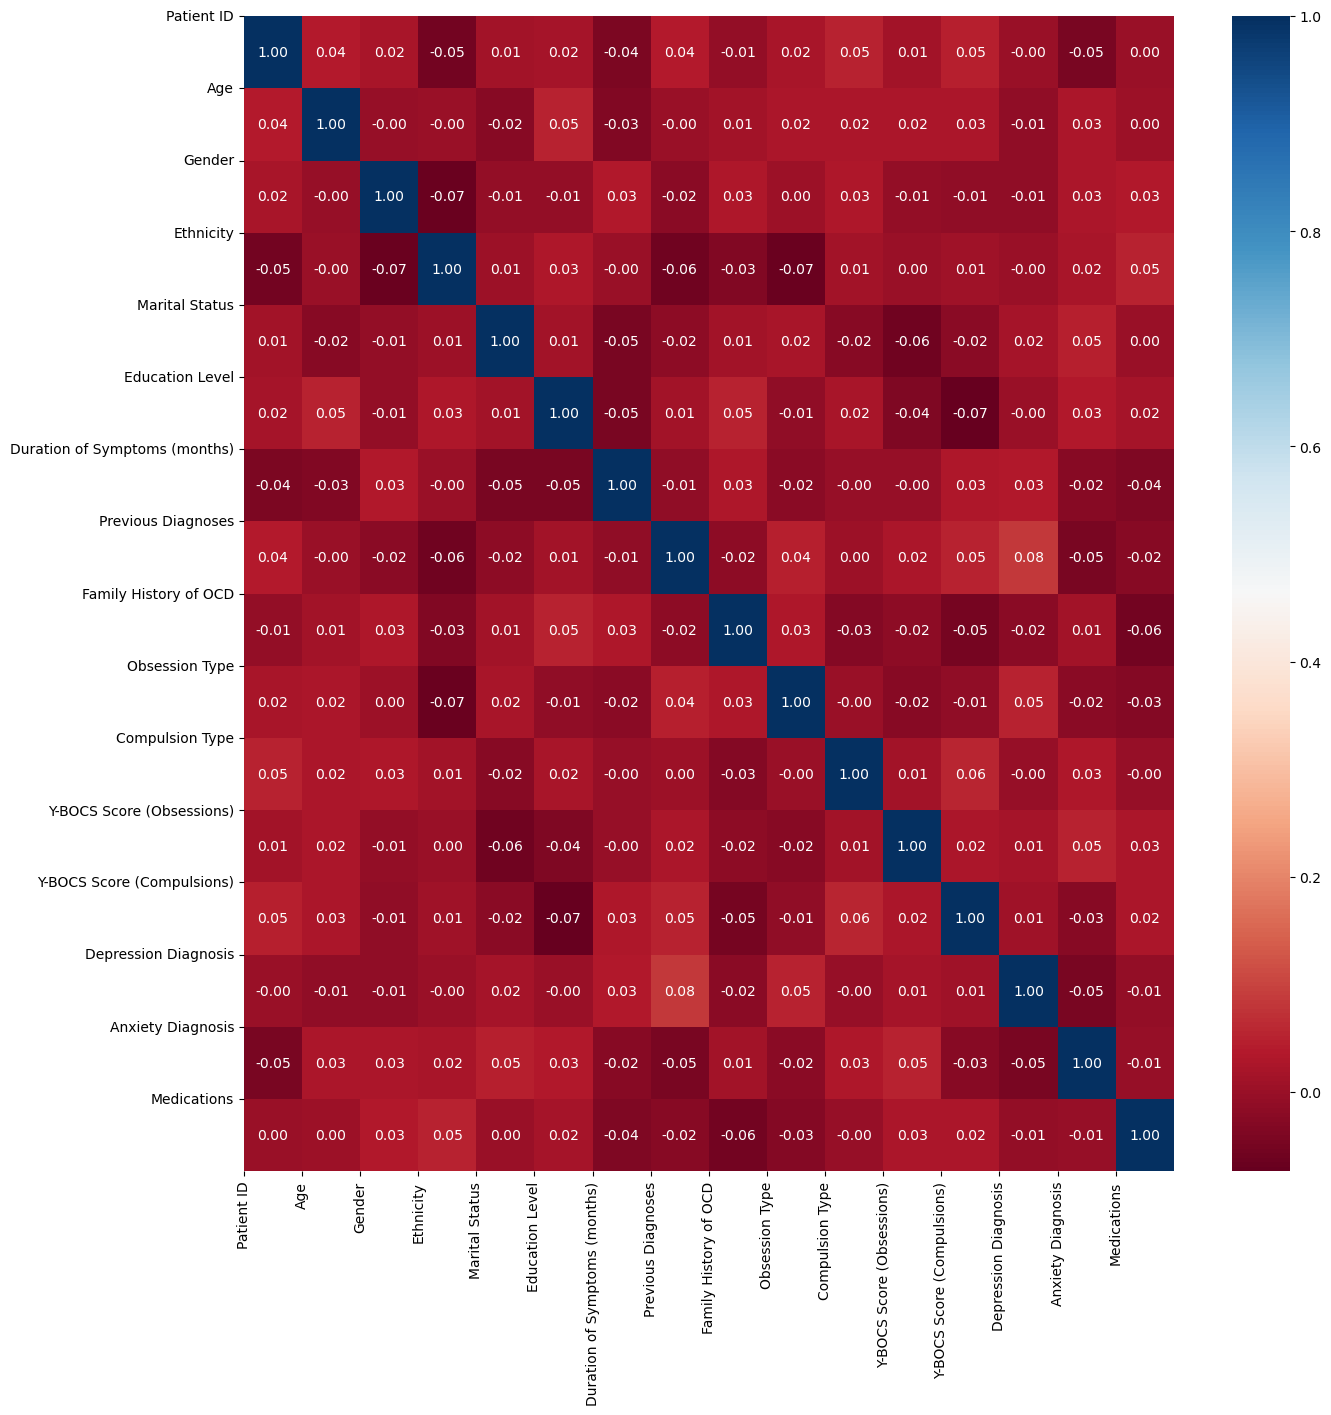

In [211]:
corr = train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [217]:
X= train.drop(columns=['Medications'],axis=1)
y= train['Medications']

In [221]:
X_train=X
y_train=y
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
X_train = MinMaxScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000111,0.245614,0.0,0.000000,0.0,0.000000,0.845494,0.000000,0.0,0.00,0.00,0.425,0.250,1.0,1.0
1,0.154712,0.894737,1.0,0.000000,0.5,0.000000,0.746781,0.487487,1.0,0.00,0.25,0.525,0.625,1.0,1.0
2,0.019047,0.684211,1.0,0.333333,0.5,0.333333,0.716738,0.000000,0.0,0.25,0.00,0.075,0.100,0.0,0.0
3,0.577300,0.157895,0.0,0.333333,1.0,0.333333,0.515021,0.333333,1.0,0.50,0.25,0.350,0.700,1.0,1.0
4,0.660392,0.245614,0.0,0.666667,1.0,0.333333,0.171674,0.666667,0.0,0.75,0.50,0.650,0.275,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,0.485297,0.350877,1.0,0.333333,0.5,0.333333,0.201717,0.000000,0.0,0.25,0.25,0.525,0.825,1.0,1.0
1110,0.445088,0.017544,0.0,0.333333,0.5,1.000000,0.660944,0.666667,1.0,0.75,0.75,0.625,0.400,1.0,1.0
1111,0.564937,0.385965,1.0,0.666667,1.0,0.000000,0.403433,0.487487,1.0,0.25,1.00,0.050,0.375,1.0,1.0
1112,0.310871,0.333333,0.0,1.000000,1.0,0.000000,0.875536,0.666667,1.0,0.25,0.25,0.400,0.175,1.0,0.0


In [225]:
X_train, X_eval, y_train, y_eval= train_test_split(X_train,y_train, test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (712, 15)
Shape of X_eval:  (179, 15)
Shape of y_train:  (712,)
Shape of y_eval (179,)


In [229]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np

# Classifiers
clf1 = SVC()
clf2 = LGBMClassifier()
clf3 = LogisticRegression()
clf4 = SGDClassifier()
clf5 = XGBClassifier(objective='multi:softmax')
clf6 = KNeighborsClassifier()
clf7 = RandomForestClassifier()
clf8 = ExtraTreesClassifier()
clf9 = HistGradientBoostingClassifier()

# Voting Classifier
eclf = VotingClassifier(
    estimators=[
        ('svm', clf1),
        ('LGBM', clf2),
        ('Log', clf3),
        ('SGD', clf4),
        ('XGBoost', clf5),
        ('KNeighbors', clf6),
        ('RandomForest', clf7),
        ('ExtraTrees', clf8),
        ('HistGradientBoosting', clf9)
    ],
    voting='hard'
)

# List of classifiers and labels
classifiers = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, eclf]
labels = ['SVC', 'LGBM', 'Log', 'SGD', 'XGBoost', 'KNeighbors', 'RandomForest', 'ExtraTrees', 'HistGradientBoosting', 'Ensemble']

# Evaluate each classifier
for clf, label in zip(classifiers, labels):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.31 (+/- 0.02) [SVC]
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 15
[LightGBM] [Info] Start training from score -1.065766
[LightGBM] [Info] Start training from score -1.134394
[LightGBM] [Info] Start training from score -1.096856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] Start training from score -1.062746
[LightGBM] [Info] Start training from score -1.134356
[LightGBM] [Info] Start training from score -1.100018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

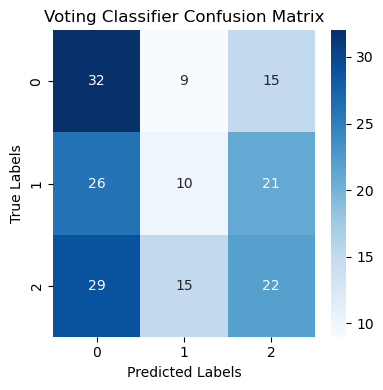

In [233]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train all models
clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
clf4 = clf4.fit(X_train, y_train)
clf5 = clf5.fit(X_train, y_train)
clf6 = clf6.fit(X_train, y_train)
clf7 = clf7.fit(X_train, y_train)
clf8 = clf8.fit(X_train, y_train)
clf9 = clf9.fit(X_train, y_train)

# Train voting classifier
Voting_model = eclf.fit(X_train, y_train)

# Predict on evaluation data
y_pred_Voting = Voting_model.predict(X_eval)

# Accuracy
Voting_acc = accuracy_score(y_eval, y_pred_Voting)
print("Voting accuracy is: {:.3f}%".format(Voting_acc * 100))

# Confusion Matrix
cm = confusion_matrix(y_eval, y_pred_Voting)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Voting Classifier Confusion Matrix")
plt.tight_layout()
plt.show()
